In [184]:
import pandas as pd
import numpy as np
%run similarities.ipynb
from datetime import timedelta

import os
import sys

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [149]:
convert={'FIPS': lambda x: str(x)}
main_df = pd.read_csv("../processed_data/combined.csv", converters = convert)

In [150]:
main_df

,date,state,fips,county,state_code,male,female,median_age,population,female_percentage,...,pct_not_proficient_in_english,pct_rural,pct_impoverished,pop_density,r_voteshare,c4,c6,stringency,protest_size,confirmed_cases
0,03-29,Delaware,10001,Kent County,DE,84271,90551,37.6,174822,51.796113,...,1,27.0,NaN,298.239449,0.495871,3.0,2.0,70.37,-1.0,3.571429
1,03-29,Delaware,10003,New Castle County,DE,268870,286263,38.1,555133,51.566562,...,2,4.6,0.110458,1302.242605,0.325945,3.0,2.0,70.37,-1.0,20.142857
2,03-29,Delaware,10005,Sussex County,DE,106429,113111,49.0,219540,51.521818,...,2,41.3,NaN,234.531237,0.590625,3.0,2.0,70.37,-1.0,9.428571
3,03-29,Florida,12001,Alachua County,FL,127298,135850,31.3,263148,51.624941,...,1,21.2,0.212770,300.733698,0.364266,4.0,2.0,71.76,-1.0,10.142857
4,03-29,Florida,12003,Baker County,FL,14753,13032,37.6,27785,46.903005,...,1,59.5,NaN,47.477060,0.814785,4.0,2.0,71.76,-1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705853,12-07,Washington,53069,Wahkiakum County,WA,2000,2189,54.3,4189,52.255908,...,1,100.0,0.124851,15.904776,0.569975,4.0,1.0,55.56,-1.0,1.000000
705854,12-07,Washington,53071,Walla Walla County,WA,30830,29406,37.1,60236,48.817983,...,4,17.1,0.131250,47.425067,0.537039,4.0,1.0,55.56,-1.0,30.142857
705855,12-07,Washington,53073,Whatcom County,WA,107228,109584,37.0,216812,50.543328,...,2,25.9,0.147972,102.907645,0.370182,4.0,1.0,55.56,-1.0,45.714286
705856,12-07,Washington,53075,Whitman County,WA,24749,23844,24.6,48593,49.068796,...,2,27.5,0.226926,22.506241,0.427795,4.0,1.0,55.56,-1.0,15.428571


In [152]:
# main_df.FIPS = [str(item).zfill(5) for item in main_df.FIPS]
main_df['date'] = main_df['date'].astype(str) + '-20'
main_df['date'] = pd.to_datetime(main_df.date)

In [153]:
window_length = 7
window_start = pd.to_datetime("05-25-2020")
window_end = window_start + timedelta(days = window_length)

window_df = main_df[(main_df['date'] >= window_start ) & (main_df['date'] < window_end)]

In [163]:
scale_vals = ['male', 'female',
       'median_age', 'population', 'female_percentage', 'lat', 'long',
       'life_expectancy', 'mortality_risk', 'all_poverty', 'sq_miles',
       'pct_none', 'pct_hs', 'pct_bachelors', 'median_household_income',
       'pct_black', 'pct_asian', 'pct_hispanic', 'pct_non_hispanic_white',
       'pct_not_proficient_in_english', 'pct_rural', 'pct_impoverished',
       'pop_density', 'r_voteshare', 'c4', 'c6', 'stringency','confirmed_cases']
scaler = MinMaxScaler().fit(window_df[scale_vals])
window_df[scale_vals] = scaler.transform(window_df[scale_vals])

/Users/Sapthau/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/Sapthau/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [157]:
yes_df = window_df[window_df["protest_size"] != -1].copy()
no_df = window_df[window_df["protest_size"] == -1].copy()

yes_df.drop(["protest_size"], axis = 1, inplace = True)
yes_df.reset_index(inplace = True, drop = True)
no_df.drop(["protest_size"], axis = 1, inplace = True)
no_df.reset_index(inplace = True, drop = True)


comparables = ['male', 'female',
       'median_age', 'population', 'female_percentage', 'lat', 'long',
       'life_expectancy', 'mortality_risk', 'all_poverty', 'sq_miles',
       'pct_none', 'pct_hs', 'pct_bachelors', 'median_household_income',
       'pct_black', 'pct_asian', 'pct_hispanic', 'pct_non_hispanic_white',
       'pct_not_proficient_in_english', 'pct_rural', 'pct_impoverished',
       'pop_density', 'r_voteshare', 'c4', 'c6', 'stringency','confirmed_cases']

search_df = yes_df[comparables].copy()
compare_df = no_df[comparables].copy()



In [158]:
def progressbar(n_step, n_total):
    """Prints self-updating progress bar to stdout to track for-loop progress
    
    There are entire 3rd-party libraries dedicated to custom progress-bars.
    A simple function like this is often more than enough to get the job done.
    
    :param n_total: total number of expected for-loop iterations
    :type n_total: int
    :param n_step: current iteration number, starting at 0
    :type n_step: int

    .. example::
    
        for i in range(n_iterations):
            progressbar(i, n_iterations)
            
    .. source:
    
        This function is a simplified version of code found here:
        https://stackoverflow.com/questions/3160699/python-progress-bar/15860757#15860757
    """
    n_step = n_step + 1
    barlen = 50
    progress = n_step / n_total
    block = int(round(barlen * progress))
    status = ""
    if n_step == n_total:
        status = "Done...\r\n\n"
    text = "\r [{0}] {1}/{2} {3}".format(
        "=" * block + "-" * (barlen - block),
        n_step,
        n_total,
        status,
    )
    sys.stdout.write(text)
    sys.stdout.flush()

In [180]:
nearest_idx = {}
checks = ["confirmed_cases"]
check_vals = [0.01]

for idx, row in search_df.iterrows():
    closest = find_approx_closest_euc(compare_df[no_df.date == yes_df.date[idx]].copy(), row,checks,check_vals, 10)
    nearest_idx[(yes_df.fips[idx], yes_df.date[idx])] = no_df.fips[closest].values
    progressbar(idx, yes_df.shape[0])
    
    

 [===-----------------------------------------------] 58/957 

KeyboardInterrupt: 

In [179]:
count = 0
for key in nearest_idx:
    count += len(nearest_idx[key]) == 0

count

79

(array([891.,  38.,   0.,   0.,   0.,   5.,   1.,   2.,   1.,   2.]),
 array([0.01673381, 0.11506043, 0.21338705, 0.31171367, 0.41004029,
        0.5083669 , 0.60669352, 0.70502014, 0.80334676, 0.90167338,
        1.        ]),
 <BarContainer object of 10 artists>)

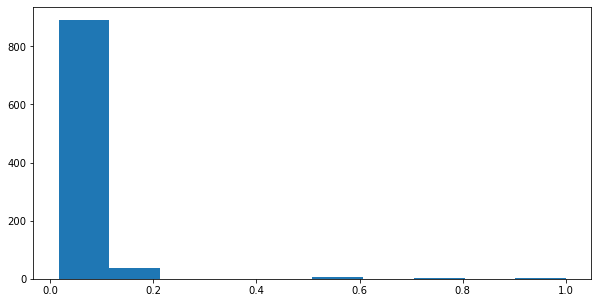

In [185]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.hist(yes_df.confirmed_cases)